In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.lines as mlines
import sklearn as sk
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [2]:
price_data = pd.read_excel(r"/Users/saishshetty/Documents/Coding_materials/importantmajorprojectmlapril/Data_Train.xlsx")
price_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [3]:
price_test_data = pd.read_excel(r'/Users/saishshetty/Documents/Coding_materials/importantmajorprojectmlapril/Data_Test.xlsx')
price_test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


# Exploratory Data Analysis 

In [4]:
price_data.shape

(6019, 12)

In [5]:
price_test_data.shape

(1234, 11)

In our training dataset we have both categorical and numerical data. We can divide our data as follows:
Independent variables:

1. Categorical variables: Location, Fuel_type, Transmission, Owner_Type,Seats
2. Numerical variables: Year, Kilometers_Driven, Mileage, Engine, Power
3. Nominal variable: Name

Dependent variables:
1. Price (Numerical variable)

In [6]:
price_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
price_test_data.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [8]:
price_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [9]:
price_test_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [10]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [11]:
price_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


Outlining unique categorical variables-

In [12]:
price_data.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [13]:
price_data.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [14]:
price_data.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [15]:
price_data.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

Check if any data consists of null values-

In [16]:
price_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [17]:
price_test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [18]:
price_test_data[price_test_data['Power']=='null bhp']['Power'].count()

22

In [19]:
price_data[price_data['Power']=='null bhp']['Power'].count()

107

In [20]:
price_data['Power']= price_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
price_test_data['Power']= price_test_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
price_data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [21]:
price_test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                32
Seats                11
dtype: int64

In [22]:
price_data.dropna(how = 'any',inplace = True)
price_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [23]:
price_data.shape

(5872, 12)

In [24]:
price_test_data.dropna(inplace= True)
price_test_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [25]:
price_test_data.shape

(1201, 11)

Convert all numerical variables to numerical values in the data-

In [26]:
columns_to_be_converted = ['Power','Engine','Mileage']

def remove_units_from_data(list_of_columns_with_units):
    for i in range(len(list_of_columns_with_units)):
        price_data[list_of_columns_with_units[i]] = price_data[list_of_columns_with_units[i]].str.split(" " , expand = True)
        price_data[list_of_columns_with_units[i]] = price_data[list_of_columns_with_units[i]].astype("float")
        price_test_data[list_of_columns_with_units[i]] = price_test_data[list_of_columns_with_units[i]].str.split(" " , expand = True)
        price_test_data[list_of_columns_with_units[i]] = price_test_data[list_of_columns_with_units[i]].astype("float")

        
remove_units_from_data(columns_to_be_converted)
price_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [27]:
price_test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0


To make this model more robust, I am converting the year column to the column of the car's age, basically how many years it has been since it launched-

In [28]:
current_year = 2020
price_data.Year = current_year - price_data.Year 
price_data.rename(columns ={'Year':'Years_since_launch'},inplace = True)
price_data.head()

,Name,Location,Years_since_launch,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [29]:
price_test_data.Year = current_year - price_test_data.Year
price_test_data.rename(columns ={'Year':'Years_since_launch'},inplace =True)
price_test_data.head()

,Name,Location,Years_since_launch,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,6,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,7,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,3,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
4,Hyundai i20 Magna,Mumbai,6,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0
5,Mahindra XUV500 W8 2WD,Coimbatore,4,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0


Extracting new columns of Brand and car model from the Name column as they are the significant information out of that column which influence the price of the car - 

In [30]:
car_train_info = price_data['Name'].str.split(" ", n =2,expand = True)
price_data['Car_Brand'] = car_train_info[0]
price_data['Car_Model'] = car_train_info[1]
price_data['Car_Specifications'] = car_train_info[2]
price_data.drop(columns = ['Name'] ,inplace =True)
price_data

,Location,Years_since_launch,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Specifications
0,Mumbai,10,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG
1,Pune,5,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,9,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,V
3,Chennai,8,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,7,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,6,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti,Swift,VDI
6015,Jaipur,5,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai,Xcent,1.1 CRDi S
6016,Jaipur,8,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra,Xylo,D4 BSIV
6017,Kolkata,7,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti,Wagon,R VXI


In [31]:
price_data = price_data[['Car_Brand','Car_Model','Car_Specifications','Location','Years_since_launch','Kilometers_Driven','Owner_Type','Fuel_Type','Transmission','Mileage','Engine','Power','Seats','Price']]
price_data.head()

,Car_Brand,Car_Model,Car_Specifications,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon,R LXI CNG,Mumbai,10,72000,First,CNG,Manual,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta,1.6 CRDi SX Option,Pune,5,41000,First,Diesel,Manual,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz,V,Chennai,9,46000,First,Petrol,Manual,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga,VDI,Chennai,8,87000,First,Diesel,Manual,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4,New 2.0 TDI Multitronic,Coimbatore,7,40670,Second,Diesel,Automatic,15.20,1968.0,140.80,5.0,17.74


In [32]:
#for test data
car_test_info = price_test_data['Name'].str.split(" ", n =2,expand = True)
price_test_data['Car_Brand'] = car_test_info[0]
price_test_data['Car_Model'] = car_test_info[1]
price_test_data['Car_Specifications'] = car_test_info[2]
price_test_data.drop(columns = ['Name'] ,inplace =True)
price_test_data = price_test_data[['Car_Brand','Car_Model','Car_Specifications','Location','Years_since_launch','Kilometers_Driven','Owner_Type','Fuel_Type','Transmission','Mileage','Engine','Power','Seats']]
price_test_data.head()

,Car_Brand,Car_Model,Car_Specifications,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
0,Maruti,Alto,K10 LXI CNG,Delhi,6,40929,First,CNG,Manual,32.26,998.0,58.20,4.0
1,Maruti,Alto,800 2016-2019 LXI,Coimbatore,7,54493,Second,Petrol,Manual,24.70,796.0,47.30,5.0
2,Toyota,Innova,Crysta Touring Sport 2.4 MT,Mumbai,3,34000,First,Diesel,Manual,13.68,2393.0,147.80,7.0
4,Hyundai,i20,Magna,Mumbai,6,29000,First,Petrol,Manual,18.50,1197.0,82.85,5.0
5,Mahindra,XUV500,W8 2WD,Coimbatore,4,85609,Second,Diesel,Manual,16.00,2179.0,140.00,7.0


### Now after dropping null values, removing the units and converting the year column, and adding the brand and car model columns, this is our price data-

In [33]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Brand           5872 non-null   object 
 1   Car_Model           5872 non-null   object 
 2   Car_Specifications  5872 non-null   object 
 3   Location            5872 non-null   object 
 4   Years_since_launch  5872 non-null   int64  
 5   Kilometers_Driven   5872 non-null   int64  
 6   Owner_Type          5872 non-null   object 
 7   Fuel_Type           5872 non-null   object 
 8   Transmission        5872 non-null   object 
 9   Mileage             5872 non-null   float64
 10  Engine              5872 non-null   float64
 11  Power               5872 non-null   float64
 12  Seats               5872 non-null   float64
 13  Price               5872 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 688.1+ KB


In [34]:
price_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Brand           1201 non-null   object 
 1   Car_Model           1201 non-null   object 
 2   Car_Specifications  1200 non-null   object 
 3   Location            1201 non-null   object 
 4   Years_since_launch  1201 non-null   int64  
 5   Kilometers_Driven   1201 non-null   int64  
 6   Owner_Type          1201 non-null   object 
 7   Fuel_Type           1201 non-null   object 
 8   Transmission        1201 non-null   object 
 9   Mileage             1201 non-null   float64
 10  Engine              1201 non-null   float64
 11  Power               1201 non-null   float64
 12  Seats               1201 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 131.4+ KB


# Data Visualisation

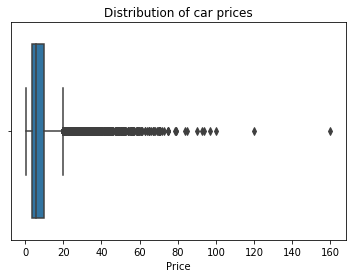

In [35]:
plt.title('Distribution of car prices')
sb.boxplot(price_data.Price)

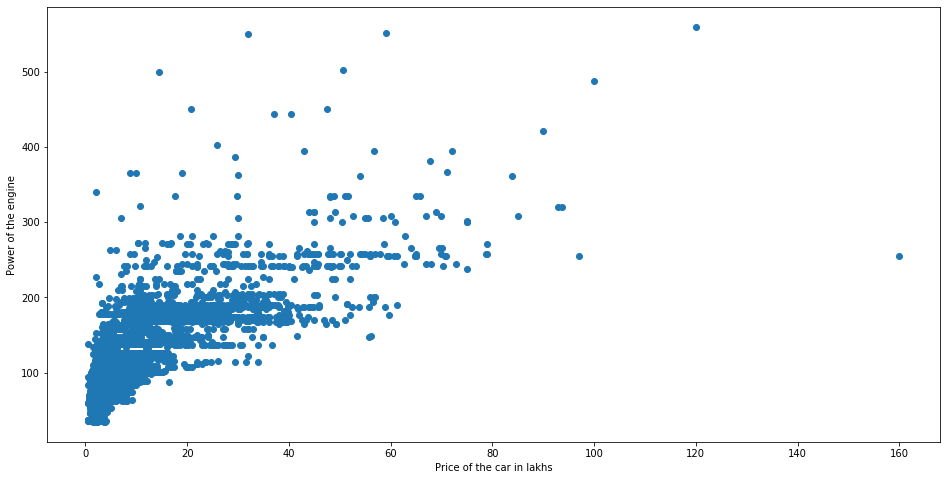

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(price_data['Price'], price_data['Power'])
ax.set_xlabel('Price of the car in lakhs')
ax.set_ylabel('Power of the engine')
plt.show()

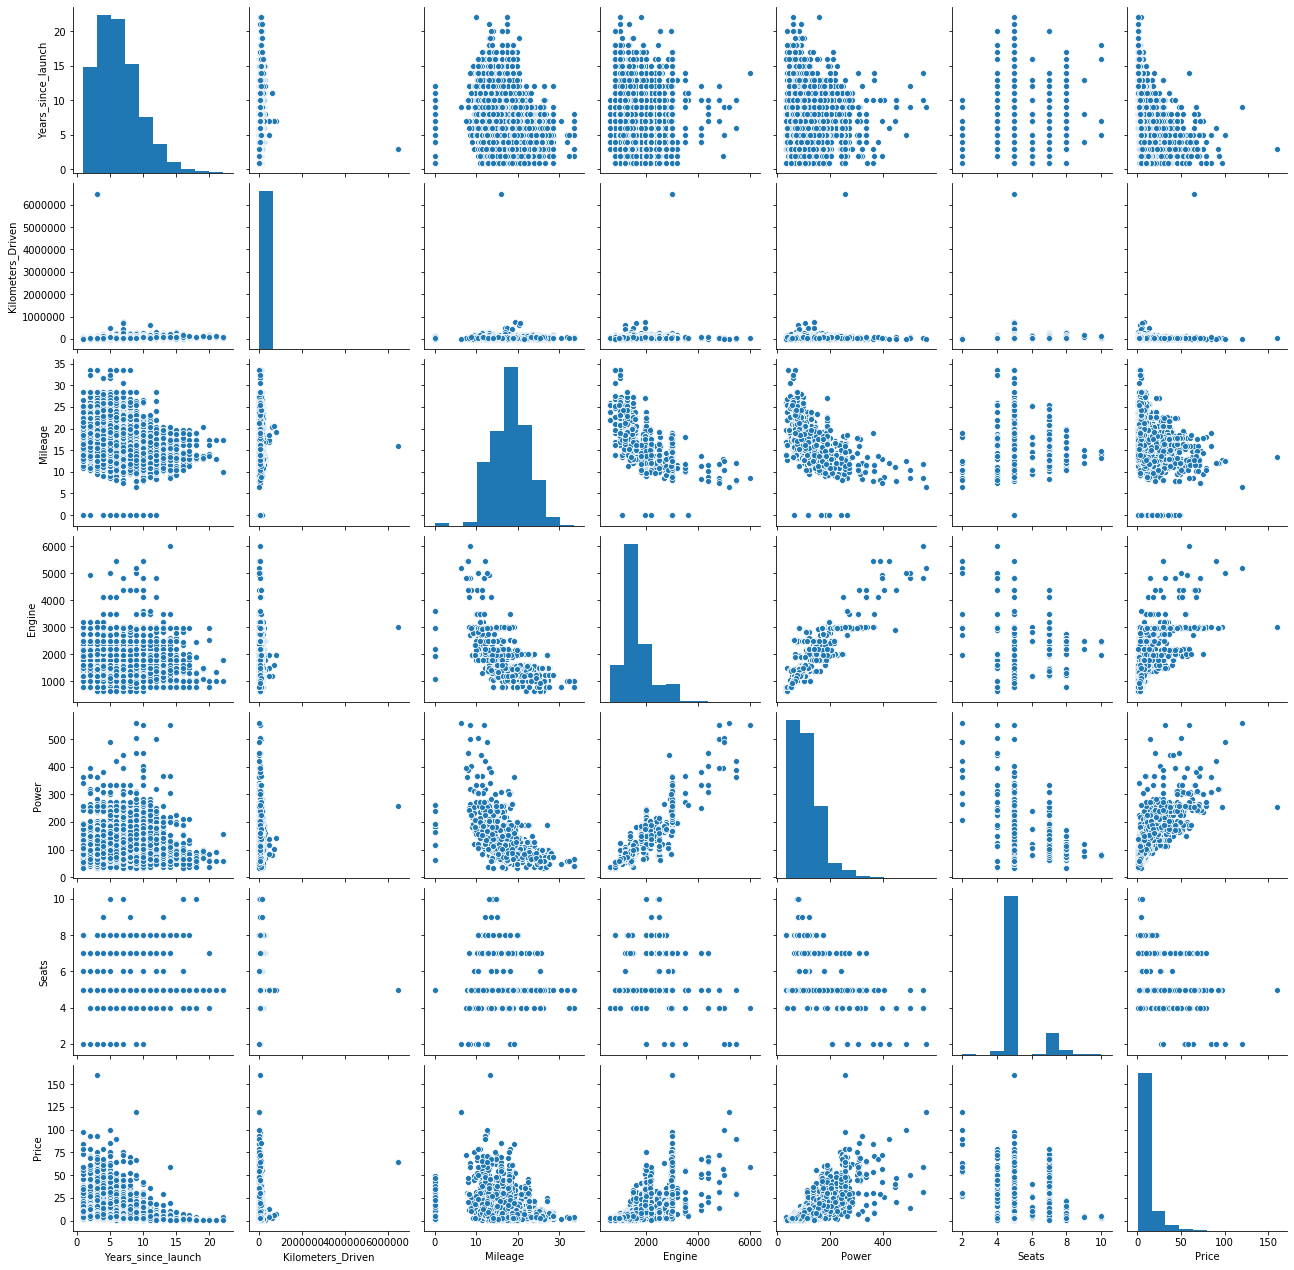

In [37]:
sb.pairplot(price_data)

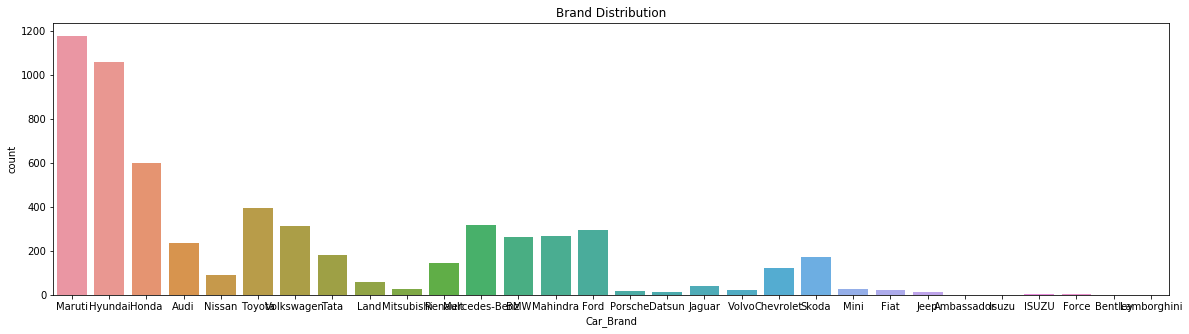

In [38]:
plt.figure(figsize=(20,5))

c1=['orange','skyblue','yellow','lawngreen','violet','gold',]
c2=['hotpink','lime','red','sandybrown','grey']
plt.title("Brand Distribution")
sb.countplot(x=price_data['Car_Brand'])

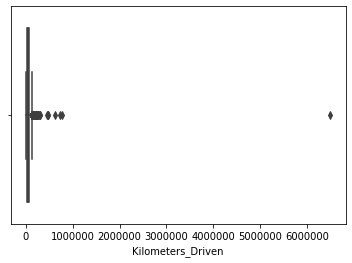

In [39]:
sb.boxplot(x=price_data['Kilometers_Driven'])

Text(0.5, 1.0, 'Price vs location with influence of Owner_type')

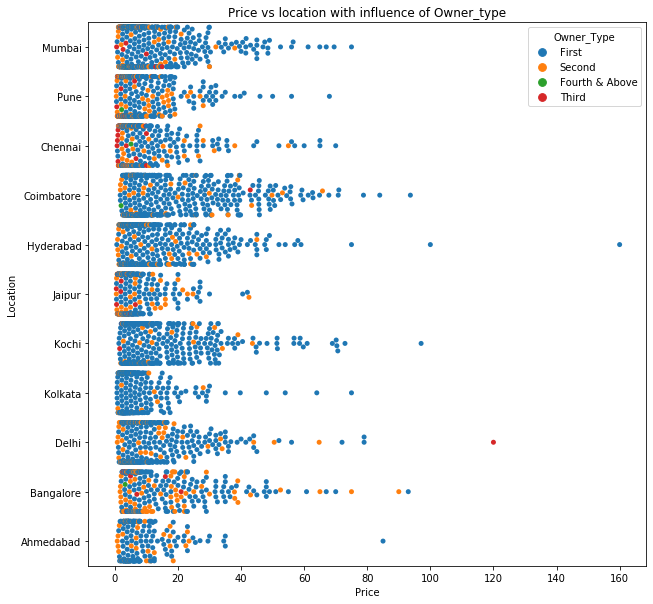

In [40]:
plt.figure(figsize=(10,10))
sb.swarmplot(y=price_data['Location'],x=price_data['Price'],hue=price_data["Owner_Type"])
plt.title("Price vs location with influence of Owner_type")

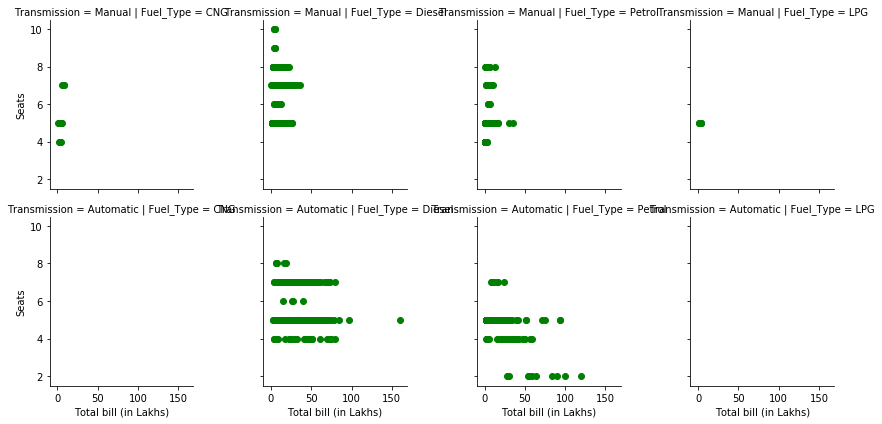

In [41]:
g = sb.FacetGrid(price_data, col="Fuel_Type", row="Transmission")
g = (g.map(plt.scatter, "Price", "Seats", color="g")
      .set_axis_labels("Total bill (in Lakhs)", "Seats"))

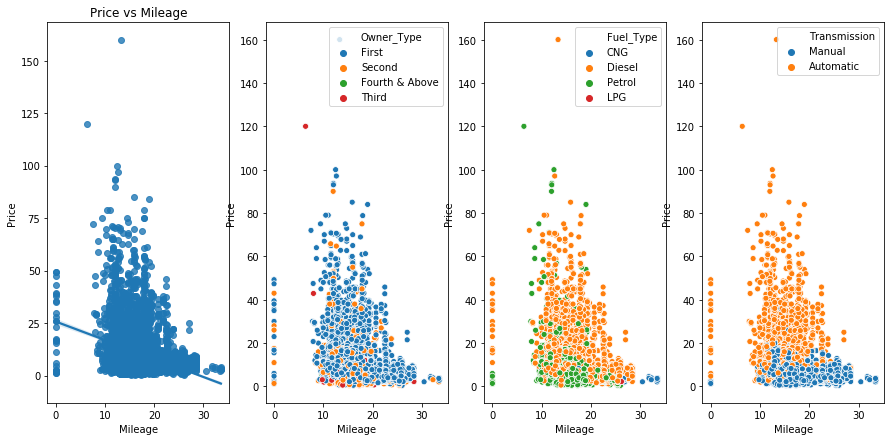

In [42]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sb.regplot(x=price_data['Mileage'],y=price_data['Price'])
plt.title("Price vs Mileage")
plt.subplot(1,4,2)
sb.scatterplot(x=price_data['Mileage'],y=price_data['Price'],hue=price_data['Owner_Type'])
plt.subplot(1,4,3)
sb.scatterplot(x=price_data['Mileage'],y=price_data['Price'],hue=price_data['Fuel_Type'])
plt.subplot(1,4,4)
sb.scatterplot(x=price_data['Mileage'],y=price_data['Price'],hue=price_data['Transmission'])

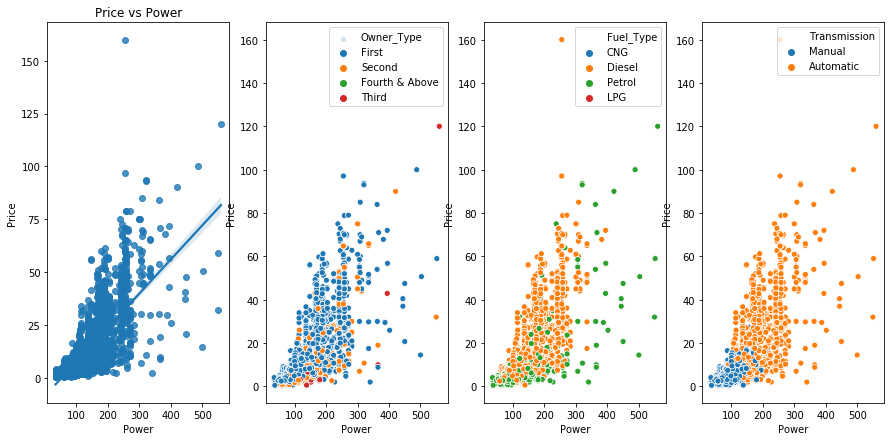

In [43]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sb.regplot(x=price_data['Power'],y=price_data['Price'])
plt.title("Price vs Power")
plt.subplot(1,4,2)
sb.scatterplot(x=price_data['Power'],y=price_data['Price'],hue=price_data['Owner_Type'])
plt.subplot(1,4,3)
sb.scatterplot(x=price_data['Power'],y=price_data['Price'],hue=price_data['Fuel_Type'])
plt.subplot(1,4,4)
sb.scatterplot(x=price_data['Power'],y=price_data['Price'],hue=price_data['Transmission'])

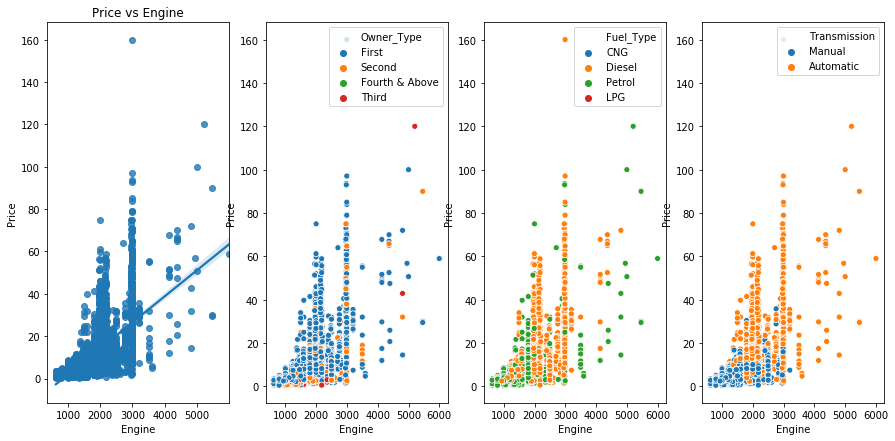

In [44]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sb.regplot(x=price_data['Engine'],y=price_data['Price'])
plt.title("Price vs Engine")
plt.subplot(1,4,2)
sb.scatterplot(x=price_data['Engine'],y=price_data['Price'],hue=price_data['Owner_Type'])
plt.subplot(1,4,3)
sb.scatterplot(x=price_data['Engine'],y=price_data['Price'],hue=price_data['Fuel_Type'])
plt.subplot(1,4,4)
sb.scatterplot(x=price_data['Engine'],y=price_data['Price'],hue=price_data['Transmission'])

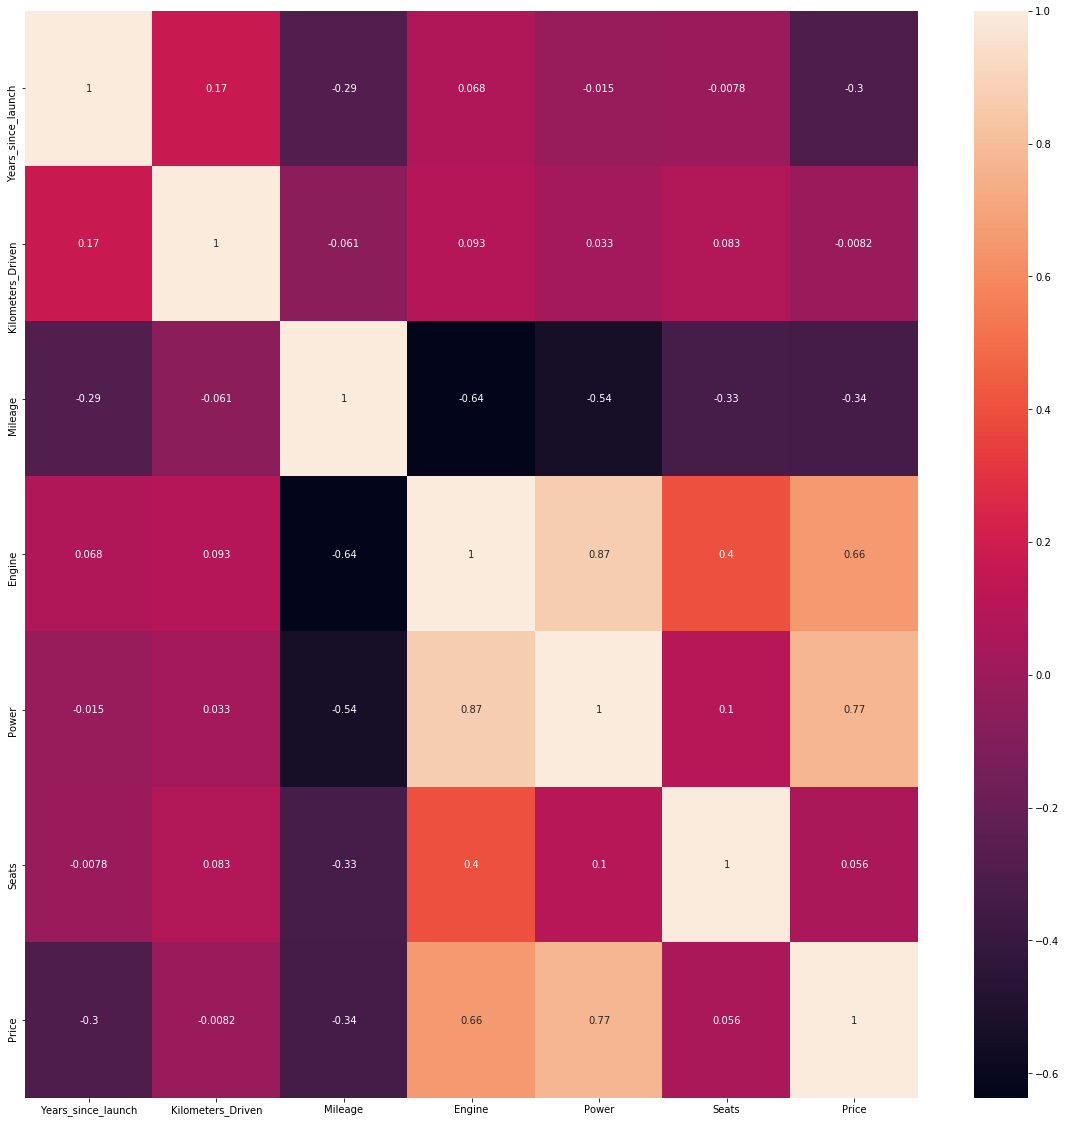

In [45]:
plt.figure(figsize= (20,20))

sb.heatmap(price_data.corr(), annot=True)

# Feature Selection -

### Assign categorical variables to a unique value based on a condition - 

In [46]:
price_data.head(20)

,Car_Brand,Car_Model,Car_Specifications,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon,R LXI CNG,Mumbai,10,72000,First,CNG,Manual,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta,1.6 CRDi SX Option,Pune,5,41000,First,Diesel,Manual,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz,V,Chennai,9,46000,First,Petrol,Manual,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga,VDI,Chennai,8,87000,First,Diesel,Manual,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4,New 2.0 TDI Multitronic,Coimbatore,7,40670,Second,Diesel,Automatic,15.20,1968.0,140.80,5.0,17.74
5,Hyundai,EON,LPG Era Plus Option,Hyderabad,8,75000,First,LPG,Manual,21.10,814.0,55.20,5.0,2.35
6,Nissan,Micra,Diesel XV,Jaipur,7,86999,First,Diesel,Manual,23.08,1461.0,63.10,5.0,3.50
7,Toyota,Innova,Crysta 2.8 GX AT 8S,Mumbai,4,36000,First,Diesel,Automatic,11.36,2755.0,171.50,8.0,17.50
8,Volkswagen,Vento,Diesel Comfortline,Pune,7,64430,First,Diesel,Manual,20.54,1598.0,103.60,5.0,5.20
9,Tata,Indica,Vista Quadrajet LS,Chennai,8,65932,Second,Diesel,Manual,22.30,1248.0,74.00,5.0,1.95


In [47]:
unrelated_cat_variables = ['Car_Brand','Fuel_Type','Location','Owner_Type','Transmission']
related_cat_variables = ['Car_Model']

def convert_categorical_numerical(categorical_list):
    for i in range(len(categorical_list)):
        uniques = price_data[categorical_list[i]].unique()
        num = list(np.arange(price_data[categorical_list[i]].nunique()))
        price_data[categorical_list[i]] = price_data[categorical_list[i]].map({t : n+1 for t,n in zip(uniques,num)})
        #test_uniques = price_test_data[categorical_list[i]].unique()
        #test_num = list(np.arange(price_test_data[categorical_list[i]].nunique()))
        price_test_data[categorical_list[i]] = price_test_data[categorical_list[i]].map({t : n+1 for t,n in zip(uniques,num)})

convert_categorical_numerical(unrelated_cat_variables)
price_data

,Car_Brand,Car_Model,Car_Specifications,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,1,Wagon,R LXI CNG,1,10,72000,1,1,1,26.60,998.0,58.16,5.0,1.75
1,2,Creta,1.6 CRDi SX Option,2,5,41000,1,2,1,19.67,1582.0,126.20,5.0,12.50
2,3,Jazz,V,3,9,46000,1,3,1,18.20,1199.0,88.70,5.0,4.50
3,1,Ertiga,VDI,3,8,87000,1,2,1,20.77,1248.0,88.76,7.0,6.00
4,4,A4,New 2.0 TDI Multitronic,4,7,40670,2,2,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1,Swift,VDI,9,6,27365,1,2,1,28.40,1248.0,74.00,5.0,4.75
6015,2,Xcent,1.1 CRDi S,6,5,100000,1,2,1,24.40,1120.0,71.00,5.0,4.00
6016,14,Xylo,D4 BSIV,6,8,55000,2,2,1,14.00,2498.0,112.00,8.0,2.90
6017,1,Wagon,R VXI,8,7,46000,1,3,1,18.90,998.0,67.10,5.0,2.65


In [48]:
price_test_data

,Car_Brand,Car_Model,Car_Specifications,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
0,1.0,Alto,K10 LXI CNG,9,6,40929,1,1,1,32.26,998.0,58.20,4.0
1,1.0,Alto,800 2016-2019 LXI,4,7,54493,2,3,1,24.70,796.0,47.30,5.0
2,6.0,Innova,Crysta Touring Sport 2.4 MT,1,3,34000,1,2,1,13.68,2393.0,147.80,7.0
4,2.0,i20,Magna,1,6,29000,1,3,1,18.50,1197.0,82.85,5.0
5,14.0,XUV500,W8 2WD,4,4,85609,2,2,1,16.00,2179.0,140.00,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,7.0,Vento,Diesel Trendline,5,9,89411,1,2,1,20.54,1598.0,103.60,5.0
1230,7.0,Polo,GT TSI,1,5,59000,1,3,2,17.21,1197.0,103.60,5.0
1231,5.0,Micra,Diesel XV,8,8,28000,1,2,1,23.08,1461.0,63.10,5.0
1232,7.0,Polo,GT TSI,2,7,52262,4,3,2,17.20,1197.0,103.60,5.0


In [49]:
print(price_data.Car_Brand.unique())
print(price_data.Car_Brand.nunique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
30


In [50]:
print(price_test_data.Car_Brand.unique())
print(price_test_data.Car_Brand.nunique())

[ 1.  6.  2. 14.  3.  4.  5. 13. 15. 21.  7. 10. 12.  8. 20. 17. 18. 23.
 11. 22. 29.  9. 19. 26. 24. 16. 27. nan]
27


In [51]:
price_test_data = price_test_data.fillna(0)
def convert_int(var_list):
    price_data[var_list] = price_data[var_list].astype("int32" , copy = False)
    price_test_data[var_list] = price_test_data[var_list].astype("int32" , copy = False)
    
    
convert_int(unrelated_cat_variables)
convert_int('Years_since_launch')

In [52]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Brand           5872 non-null   int32  
 1   Car_Model           5872 non-null   object 
 2   Car_Specifications  5872 non-null   object 
 3   Location            5872 non-null   int32  
 4   Years_since_launch  5872 non-null   int32  
 5   Kilometers_Driven   5872 non-null   int64  
 6   Owner_Type          5872 non-null   int32  
 7   Fuel_Type           5872 non-null   int32  
 8   Transmission        5872 non-null   int32  
 9   Mileage             5872 non-null   float64
 10  Engine              5872 non-null   float64
 11  Power               5872 non-null   float64
 12  Seats               5872 non-null   float64
 13  Price               5872 non-null   float64
dtypes: float64(5), int32(6), int64(1), object(2)
memory usage: 710.5+ KB


In [53]:
price_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Brand           1201 non-null   int32  
 1   Car_Model           1201 non-null   object 
 2   Car_Specifications  1201 non-null   object 
 3   Location            1201 non-null   int32  
 4   Years_since_launch  1201 non-null   int32  
 5   Kilometers_Driven   1201 non-null   int64  
 6   Owner_Type          1201 non-null   int32  
 7   Fuel_Type           1201 non-null   int32  
 8   Transmission        1201 non-null   int32  
 9   Mileage             1201 non-null   float64
 10  Engine              1201 non-null   float64
 11  Power               1201 non-null   float64
 12  Seats               1201 non-null   float64
dtypes: float64(4), int32(6), int64(1), object(2)
memory usage: 103.2+ KB


In [54]:
price_test_data.head(10)

,Car_Brand,Car_Model,Car_Specifications,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
0,1,Alto,K10 LXI CNG,9,6,40929,1,1,1,32.26,998.0,58.20,4.0
1,1,Alto,800 2016-2019 LXI,4,7,54493,2,3,1,24.70,796.0,47.30,5.0
2,6,Innova,Crysta Touring Sport 2.4 MT,1,3,34000,1,2,1,13.68,2393.0,147.80,7.0
4,2,i20,Magna,1,6,29000,1,3,1,18.50,1197.0,82.85,5.0
5,14,XUV500,W8 2WD,4,4,85609,2,2,1,16.00,2179.0,140.00,7.0
6,6,Fortuner,4x2 AT TRD Sportivo,2,5,59000,1,2,2,12.55,2982.0,168.70,7.0
7,2,EON,Era Plus,6,7,65000,1,3,1,21.10,814.0,55.20,5.0
8,3,City,1.5 S MT,1,9,66000,2,3,1,17.00,1497.0,118.00,5.0
9,14,XUV500,W6 2WD,4,5,54684,1,2,1,15.10,2179.0,140.00,7.0
10,4,Q5,2008-2012 2.0 TDI,1,8,78000,2,2,2,12.80,1968.0,167.60,5.0


In [55]:
dependent_var = 'Car_Model'
independent_var = 'Car_Brand'
def assign_model_val (dataset1, dataset2, ind_var, dep_var):
    for i in dataset1[ind_var]:
        uniques = dataset1[dataset1[ind_var] == i][dep_var].unique()
        num = list(np.arange(dataset1[dataset1[ind_var] == i][dep_var].nunique()))
        dataset2.loc[dataset2[ind_var] == i , dep_var] = dataset2[dataset2[ind_var] == i][dep_var].map({t : n+1 for t,n in zip(uniques,num)})
        dataset1.loc[dataset1[ind_var] == i , dep_var] = dataset1[dataset1[ind_var] == i][dep_var].map({t : n+1 for t,n in zip(uniques,num)})
        
        
assign_model_val(price_data, price_test_data, independent_var, dependent_var)
#drop specifications column from both training and testing data
price_data.drop(columns = ['Car_Specifications'],inplace = True)
price_test_data.drop(columns = ['Car_Specifications'],inplace = True)
price_data.head(50)

,Car_Brand,Car_Model,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,1,1,1,10,72000,1,1,1,26.60,998.0,58.16,5.0,1.75
1,2,1,2,5,41000,1,2,1,19.67,1582.0,126.20,5.0,12.50
2,3,1,3,9,46000,1,3,1,18.20,1199.0,88.70,5.0,4.50
3,1,2,3,8,87000,1,2,1,20.77,1248.0,88.76,7.0,6.00
4,4,1,4,7,40670,2,2,2,15.20,1968.0,140.80,5.0,17.74
5,2,2,5,8,75000,1,4,1,21.10,814.0,55.20,5.0,2.35
6,5,1,6,7,86999,1,2,1,23.08,1461.0,63.10,5.0,3.50
7,6,1,1,4,36000,1,2,2,11.36,2755.0,171.50,8.0,17.50
8,7,1,2,7,64430,1,2,1,20.54,1598.0,103.60,5.0,5.20
9,8,1,3,8,65932,2,2,1,22.30,1248.0,74.00,5.0,1.95


In [56]:
price_test_data.head(50)

,Car_Brand,Car_Model,Location,Years_since_launch,Kilometers_Driven,Owner_Type,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
0,1,6,9,6,40929,1,1,1,32.26,998.0,58.20,4.0
1,1,6,4,7,54493,2,3,1,24.70,796.0,47.30,5.0
2,6,1,1,3,34000,1,2,1,13.68,2393.0,147.80,7.0
4,2,3,1,6,29000,1,3,1,18.50,1197.0,82.85,5.0
5,14,4,4,4,85609,2,2,1,16.00,2179.0,140.00,7.0
6,6,3,2,5,59000,1,2,2,12.55,2982.0,168.70,7.0
7,2,2,6,7,65000,1,3,1,21.10,814.0,55.20,5.0
8,3,2,1,9,66000,2,3,1,17.00,1497.0,118.00,5.0
9,14,4,4,5,54684,1,2,1,15.10,2179.0,140.00,7.0
10,4,8,1,8,78000,2,2,2,12.80,1968.0,167.60,5.0


In [58]:
#Working with single example
price_test_data.loc[price_test_data['Car_Brand'] == 0 ,'Car_Model'] = 1
#Assigning a value.

In [59]:
#fill brand values in test data not featuring in train data to zero
price_test_data = price_test_data.fillna(0)
def convert_float(var_list):
    price_data[var_list] = price_data[var_list].astype("float64" , copy = False)
    price_test_data[var_list] = price_test_data[var_list].astype("float64" , copy = False)
    
    
convert_float('Car_Model')

# Machine Learning Model-

## 1. Linear Regression -

In [60]:
from sklearn.model_selection import train_test_split
train_data_X = price_data[['Car_Brand','Car_Model','Location','Years_since_launch','Kilometers_Driven','Owner_Type','Fuel_Type','Transmission','Mileage','Engine','Power','Seats']]
train_data_y = price_data['Price']
X_train, X_test, y_train, y_test = train_test_split(train_data_X, train_data_y, test_size = 0.2)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4697 entries, 3163 to 3095
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Brand           4697 non-null   int32  
 1   Car_Model           4697 non-null   float64
 2   Location            4697 non-null   int32  
 3   Years_since_launch  4697 non-null   int32  
 4   Kilometers_Driven   4697 non-null   int64  
 5   Owner_Type          4697 non-null   int32  
 6   Fuel_Type           4697 non-null   int32  
 7   Transmission        4697 non-null   int32  
 8   Mileage             4697 non-null   float64
 9   Engine              4697 non-null   float64
 10  Power               4697 non-null   float64
 11  Seats               4697 non-null   float64
dtypes: float64(5), int32(6), int64(1)
memory usage: 367.0 KB


In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lreg = LinearRegression()
lreg.fit(X_train,y_train)
y_pred_linear = lreg.predict(X_test)
print('The Score on the train set with a linear regression is:', lreg.score(X_train,y_train))
print('The Score on the test set with a linear regression is:', lreg.score(X_test,y_test))
print("Accuracy :",lreg.score(X_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error (rmse): %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("The r2_score is: ", r2_score(y_test, y_pred_linear))

The Score on the train set with a linear regression is: 0.6959623929322589
The Score on the test set with a linear regression is: 0.70585910459857
Accuracy : 70.585910459857 %
Mean squared error (rmse): 6.00
The r2_score is:  0.70585910459857


## 2. Using turicreate -

In [62]:
import turicreate as tc

In [63]:
sf_train=tc.SFrame(data=price_data)
sf_test=tc.SFrame(data=price_test_data)
sf_train.column_names()

['Car_Brand',
 'Car_Model',
 'Location',
 'Years_since_launch',
 'Kilometers_Driven',
 'Owner_Type',
 'Fuel_Type',
 'Transmission',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [64]:
train,cv = sf_train.random_split(0.8,seed=5)

In [65]:
set_features = ['Car_Brand','Car_Model','Location','Years_since_launch','Kilometers_Driven','Owner_Type','Fuel_Type','Transmission','Mileage','Engine','Power','Seats']
model=tc.linear_regression.create(train, target='Price', features= set_features, validation_set=None,l2_penalty=0.,l1_penalty=1e2,max_iterations=500)
print (model.coefficients['value'].nnz())

Linear regression:

--------------------------------------------------------

Number of examples          : 4695

Number of features          : 12

Number of unpacked features : 12

Number of coefficients    : 13

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 1.000000  | 1.011014     | 160.000000         | 14.646328                       |

| 1         | 2        | 0.000008  | 1.345030     | 151.164922         | 10.749440                       |

| 2         | 3        | 0.000008  | 1.383482     | 148.692005         | 10.347479                       |

| 3         | 4        | 0.000008  | 1.431151     | 147.415285         | 10.133235                       |

| 4         | 5        | 0.000008  | 1.465549     | 146.512759         | 9.903325                        |

| 5         | 6        | 0.000008  | 1.512921     | 145.598711         | 9.650424                        |

| 10        | 11       | 0.000008  | 1.662442     | 139.871390         | 8.267937                        |

| 50        | 51       | 0.000008  | 2.825911     | 124.081879         | 6.151999                        |

| 100       | 101      | 0.000008  | 4.454828     | 123.905378         | 6.118055                        |

| 150       | 151      | 0.000008  | 6.071165     | 124.081082         | 6.107188                        |

| 200       | 201      | 0.000008  | 7.637873     | 123.996220         | 6.100539                        |

| 250       | 251      | 0.000008  | 9.363778     | 123.872801         | 6.094887                        |

| 300       | 301      | 0.000008  | 10.844546    | 123.837684         | 6.090712                        |

| 350       | 351      | 0.000008  | 12.205608    | 123.755418         | 6.088761                        |

| 398       | 399      | 0.000008  | 13.468628    | 123.740689         | 6.088131                        |

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

12


In [66]:
s={}
dicti={}
coeff=model.coefficients
rows=coeff.num_rows()
for i in range(rows):
    s[model.coefficients['name'][i]]= model.coefficients['value'][i]
print(s)


print(model.evaluate(cv))

print(cv['Price'].head())

model.predict(cv).head()

{'(intercept)': 11.716173187029193, 'Car_Brand': -0.011773455770699583, 'Car_Model': 0.05832413392366058, 'Location': 0.0, 'Years_since_launch': -1.0366664328679263, 'Kilometers_Driven': 1.909274781084828e-06, 'Owner_Type': -0.2788394309827151, 'Fuel_Type': -2.4008164414727986, 'Transmission': 2.6403530489008817, 'Mileage': -0.19901788440325352, 'Engine': 0.0003530797011139413, 'Power': 0.13086648177724652, 'Seats': -0.8644007537549302}
{'max_error': 48.813254320285594, 'rmse': 6.554601643955785}
[3.5, 27.0, 5.99, 8.25, 2.85, 4.25, 9.9, 1.85, 5.58, 3.85]


dtype: float
Rows: 10
[2.043138646346021, 24.26970758754104, 6.585961005528439, 7.19303845856579, 6.1219697823764605, 0.9434680549770764, 9.297727687677455, -2.9585360125911038, 6.4341127848696775, 3.9762540146705527]

In [67]:
model.evaluate(cv)

{'max_error': 48.813254320285594, 'rmse': 6.554601643955785}

In [68]:
ls_rmse=[]
l1_penalty_values = np.logspace(1, 3, num=20)
ls=[]
for l1_penalty in l1_penalty_values:
    model_l1=tc.linear_regression.create(train, target='Price', features=set_features,
                                                validation_set=None, 
                                                l2_penalty=0., l1_penalty=l1_penalty,verbose=False,max_iterations=400)
    ls.append(model_l1.coefficients['value'].nnz())
    ls_rmse.append(model_l1.evaluate(cv)['rmse'])
print(ls)
ls_rmse

[13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 10, 10, 7]


[6.558498591744063,
 6.5582961503585455,
 6.558046424608726,
 6.5577415652548074,
 6.55736910962941,
 6.556927807226654,
 6.55642464919739,
 6.5558845685512015,
 6.555313427958774,
 6.554800053568148,
 6.554490821448854,
 6.554733250750528,
 6.555980181408177,
 6.558155345096833,
 6.563292143166463,
 6.579196509751331,
 6.580888592164191,
 6.5807214950140045,
 6.584972677649706,
 6.582825301572259]

In [69]:
print (min(ls_rmse))
print (min(l1_penalty_values))

6.554490821448854
10.0


In [70]:
req_model=tc.linear_regression.create(train, target='Price', features= set_features, validation_set=None,l2_penalty=0.,l1_penalty=112.8838,max_iterations=400)
print(req_model.coefficients['value'].nnz())
print(req_model.evaluate(cv))

Linear regression:

--------------------------------------------------------

Number of examples          : 4695

Number of features          : 12

Number of unpacked features : 12

Number of coefficients    : 13

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 1.000000  | 0.037357     | 160.000000         | 14.646328                       |

| 1         | 2        | 0.000008  | 0.361067     | 151.166040         | 10.749672                       |

| 2         | 3        | 0.000008  | 0.389445     | 148.693365         | 10.347552                       |

| 3         | 4        | 0.000008  | 0.418155     | 147.416698         | 10.133244                       |

| 4         | 5        | 0.000008  | 0.448816     | 146.514152         | 9.903329                        |

| 5         | 6        | 0.000008  | 0.484876     | 145.599983         | 9.650474                        |

| 10        | 11       | 0.000008  | 0.618697     | 139.873257         | 8.268504                        |

| 50        | 51       | 0.000008  | 1.711582     | 124.099063         | 6.152072                        |

| 100       | 101      | 0.000008  | 3.056996     | 123.939774         | 6.118286                        |

| 150       | 151      | 0.000008  | 4.391772     | 124.102830         | 6.107822                        |

| 200       | 201      | 0.000008  | 5.708906     | 124.021524         | 6.101481                        |

| 250       | 251      | 0.000008  | 7.058092     | 123.900573         | 6.095844                        |

| 300       | 301      | 0.000008  | 8.387939     | 123.868089         | 6.091525                        |

| 350       | 351      | 0.000008  | 9.727383     | 123.788767         | 6.089433                        |

| 396       | 397      | 0.000008  | 10.955859    | 123.773847         | 6.088748                        |

+-----------+----------+-----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

12
{'max_error': 48.79816182835917, 'rmse': 6.554490821409041}


In [71]:
req_model.predict(sf_test)

dtype: float
Rows: 1201
[3.934640978962652, -2.939931746519804, 17.62623323243479, 4.125573386426715, 14.964608978656244, 21.527943870429404, -1.1547842035152822, 5.756202320752852, 14.318511714794651, 19.61793450198393, 6.161441341666039, 2.7988883332455394, -0.4215833977837846, 7.847838565164691, 21.91866671819136, 23.28692202962662, 0.5796486074410083, 11.172115549903669, 5.854275520048305, 7.173919342095189, -1.0219529416783537, 1.4340976807263424, 8.164752777693879, -6.129756393915006, -9.275333059285206, 7.918487354113406, 11.833201168977636, 0.8612073476939113, 3.311365098378647, 9.95333221338466, -2.203963970380542, 8.84879614438011, 5.647186540260562, 5.540712580857646, 13.0802501433402, 11.842643077425837, 3.8430805480820798, 20.530111870427586, 8.301378869691911, 20.59937650501886, 15.867982084830642, 11.342397146304389, 7.473448269998908, 7.907808536471604, 4.934218393992468, 17.625763889829365, 9.58146513660786, 22.456403167522232, 3.4380338734927447, 6.567430935333786, 14